We will use the previously saved model for inference of handwritten numbers in a photo.

In [1]:
from tensorflow import keras

model = keras.models.load_model('mnist_GAP.keras')

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


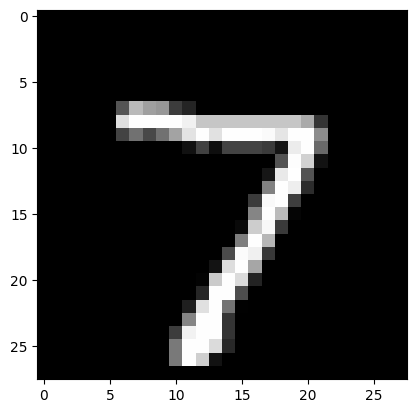

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0], cmap='gray')
plt.show()

In [4]:
import cv2
import numpy as np

sft = keras.layers.Softmax()
for i, img in enumerate(x_test):
  print(f'{y_test[i]} is predicted {np.argmax(sft(model.predict(np.expand_dims(cv2.resize(img, (25, 25)), axis=0))), axis=-1)}.')
  if i == 10:
    break


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
7 is predicted [7].
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2 is predicted [2].
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1 is predicted [1].
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
0 is predicted [0].
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
4 is predicted [4].
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1 is predicted [1].
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
4 is predicted [4].
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
9 is predicted [9].
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
5 is predicted [5].
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
9 is predicted [9].
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
0 is predicted [0].


(384, 512)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
[5]


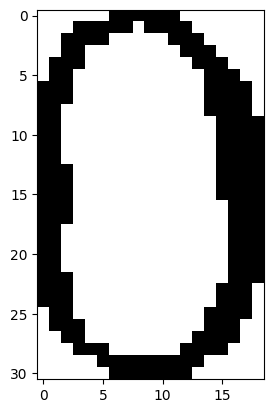

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[3]


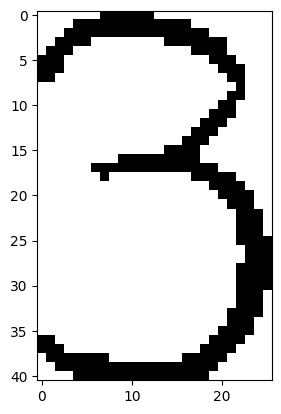

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[2]


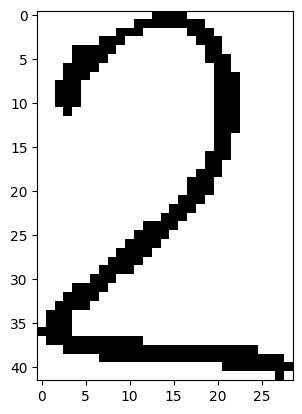

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[4]


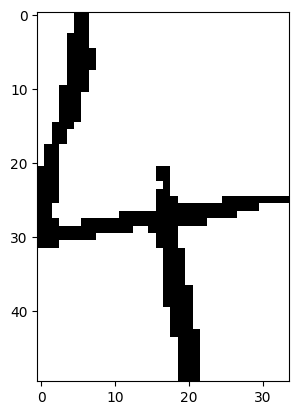

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[3]


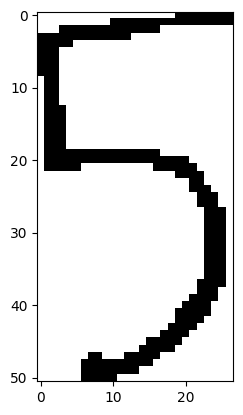

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[7]


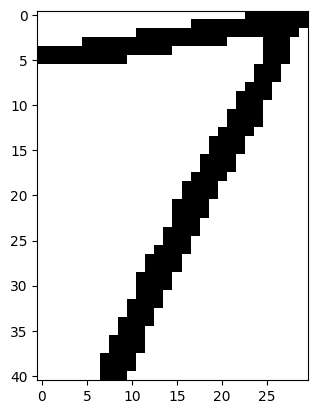

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[6]


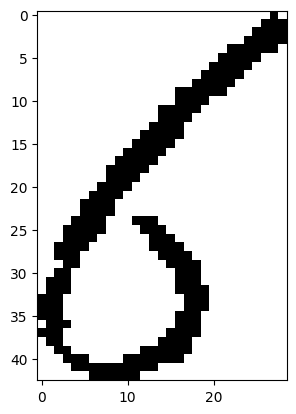

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[7]


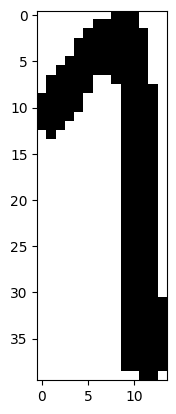

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('english-digits.jpg', cv2.IMREAD_GRAYSCALE)
thresh = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)[1]
print(thresh.shape)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(255-thresh, 4, cv2.CV_32S)

# Iterate through each connected component
for label in range(1, num_labels):
    # Get the bounding box of the current connected component
    x, y, w, h = stats[label][:4]
    # Crop the connected component using the bounding box
    connected_component = thresh[y:y+h, x:x+w]


    # Display or save the cropped connected component
    print(np.argmax(sft(model.predict(np.expand_dims(cv2.resize(255 - connected_component, (28, 28)), axis=0))), axis=-1))
    plt.imshow(connected_component, cmap='gray')
    plt.show()

We see that 3 out of 8 numbers are predicted incorrectly.